Authored by Omar Hoang

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Function to read and calculate the average score for a given RAGAS file
def calculate_ragas_average(file_path):
    data = pd.read_csv(file_path)
    return data['answer_correctness'].mean()

# List to store the averages
ragas_averages = []

# Number of runs
num_runs = 5

# Read RAGAS files, calculate averages, and store the results
for i in range(1, num_runs + 1):
    ragas_file = f'/content/drive/MyDrive/CS4371/Talos Results/Run{i}/RAGASscoreRun{i}.csv'
    ragas_avg = calculate_ragas_average(ragas_file)
    ragas_averages.append(ragas_avg)

# Convert list to DataFrame
ragas_df = pd.DataFrame(ragas_averages, columns=['RAGAS_score'])
ragas_df['run'] = range(1, num_runs + 1)

print(ragas_df)

   RAGAS_score  run
0     0.263305    1
1     0.266926    2
2     0.235776    3
3     0.232277    4
4     0.255260    5


In [ ]:
# Function to read and calculate the average score for a given RAGAS file
def calculate_geval_average(file_path):
    data = pd.read_csv(file_path)
    return data['correctness_score'].mean()

# List to store the averages
geval_averages = []

# Number of runs
num_runs = 5

# Read RAGAS files, calculate averages, and store the results
for i in range(1, num_runs + 1):
    geval_file = f'/content/drive/MyDrive/CS4371/Talos Results/Run{i}/correctness_results.csv'
    geval_avg = calculate_geval_average(geval_file)
    geval_averages.append(geval_avg)

# Convert list to DataFrame
geval_df = pd.DataFrame(geval_averages, columns=['GEval_score'])
geval_df['run'] = range(1, num_runs + 1)

print(geval_df)

   GEval_score  run
0     0.051688    1
1     0.033851    2
2     0.035731    3
3     0.017430    4
4     0.046653    5


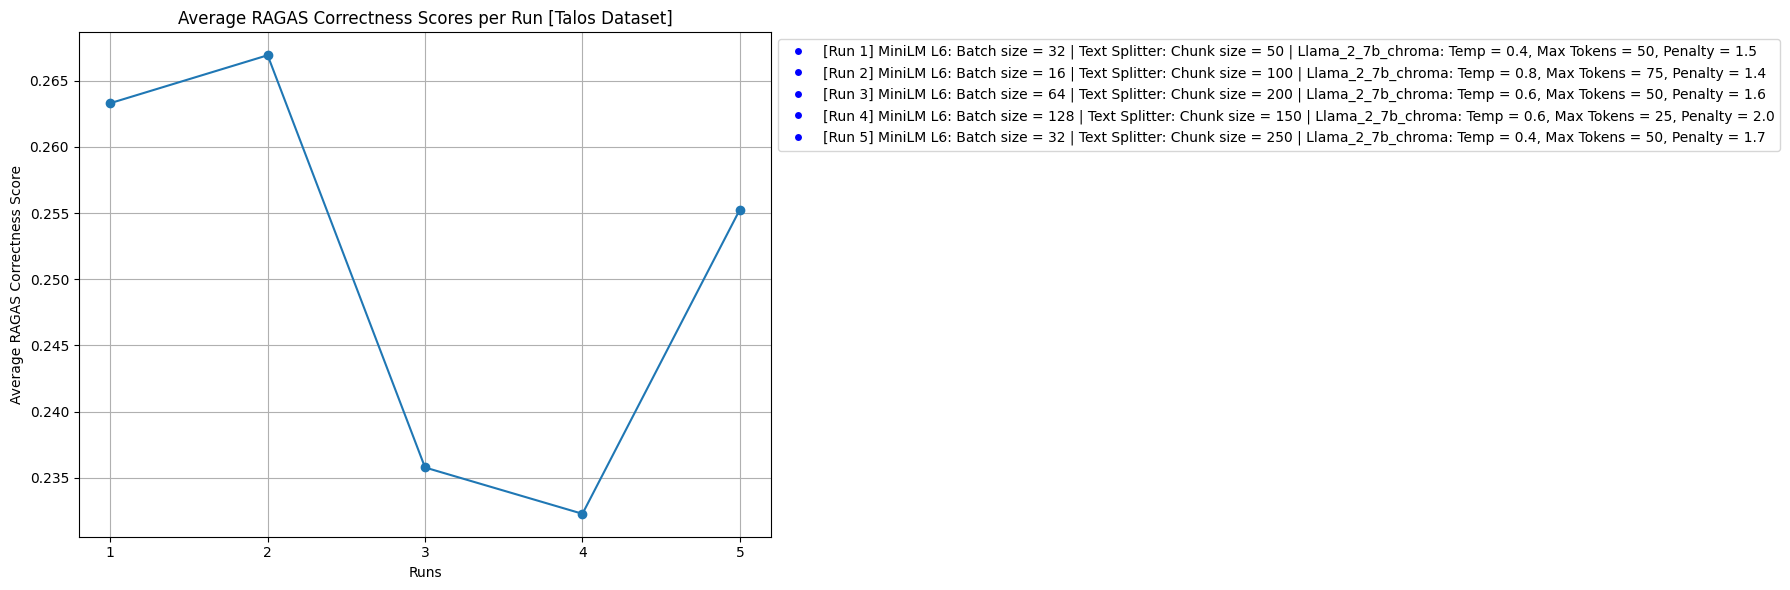

In [ ]:
import matplotlib.pyplot as plt

# Plotting the averages
plt.figure(figsize=(24, 6))

# Plot RAGAS scores
plt.plot(ragas_df['run'], ragas_df['RAGAS_score'], marker='o', label='RAGAS Score')

plt.xlabel('Runs')
plt.xticks(ragas_df['run'])
plt.ylabel('Average RAGAS Correctness Score')
plt.title('Average RAGAS Correctness Scores per Run [Talos Dataset]')
plt.legend()
plt.grid(True)

# Custom legend box
parameters = [
    "[Run 1] MiniLM L6: Batch size = 32 | Text Splitter: Chunk size = 50 | Llama_2_7b_chroma: Temp = 0.4, Max Tokens = 50, Penalty = 1.5",
    "[Run 2] MiniLM L6: Batch size = 16 | Text Splitter: Chunk size = 100 | Llama_2_7b_chroma: Temp = 0.8, Max Tokens = 75, Penalty = 1.4",
    "[Run 3] MiniLM L6: Batch size = 64 | Text Splitter: Chunk size = 200 | Llama_2_7b_chroma: Temp = 0.6, Max Tokens = 50, Penalty = 1.6",
    "[Run 4] MiniLM L6: Batch size = 128 | Text Splitter: Chunk size = 150 | Llama_2_7b_chroma: Temp = 0.6, Max Tokens = 25, Penalty = 2.0",
    "[Run 5] MiniLM L6: Batch size = 32 | Text Splitter: Chunk size = 250 | Llama_2_7b_chroma: Temp = 0.4, Max Tokens = 50, Penalty = 1.7"
]

# Add a legend with parameters
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=param, markerfacecolor='b') for param in parameters], loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.75, 1])

plt.savefig('/content/drive/MyDrive/CS4371/Talos Results/Score Averages/average_ragas_scores.jpg', format='jpg')
plt.show()

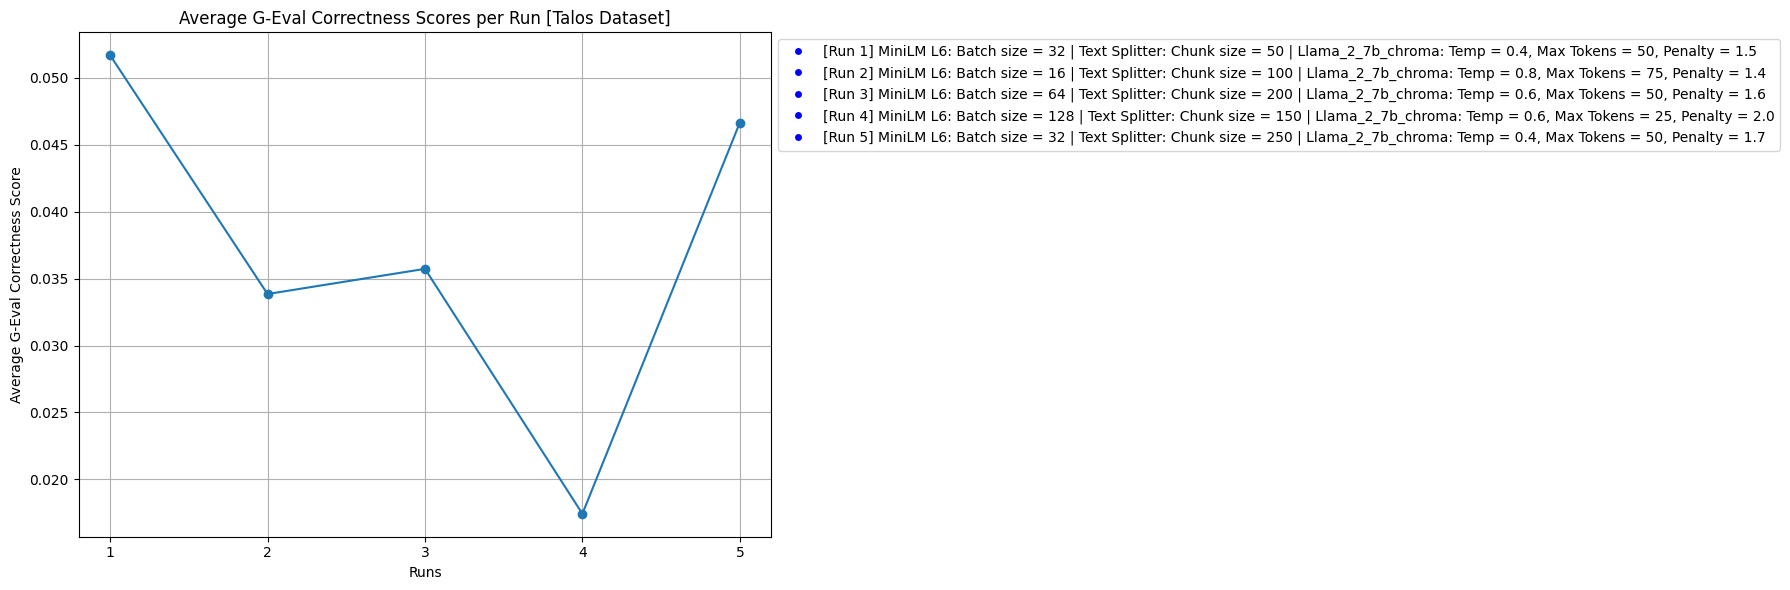

In [ ]:
# Plotting the averages
plt.figure(figsize=(24, 6))

# Plot RAGAS scores
plt.plot(geval_df['run'], geval_df['GEval_score'], marker='o', label='GEval Score')

plt.xlabel('Runs')
plt.xticks(geval_df['run'])
plt.ylabel('Average G-Eval Correctness Score')
plt.title('Average G-Eval Correctness Scores per Run [Talos Dataset]')
plt.legend()
plt.grid(True)

# Custom legend box
parameters = [
    "[Run 1] MiniLM L6: Batch size = 32 | Text Splitter: Chunk size = 50 | Llama_2_7b_chroma: Temp = 0.4, Max Tokens = 50, Penalty = 1.5",
    "[Run 2] MiniLM L6: Batch size = 16 | Text Splitter: Chunk size = 100 | Llama_2_7b_chroma: Temp = 0.8, Max Tokens = 75, Penalty = 1.4",
    "[Run 3] MiniLM L6: Batch size = 64 | Text Splitter: Chunk size = 200 | Llama_2_7b_chroma: Temp = 0.6, Max Tokens = 50, Penalty = 1.6",
    "[Run 4] MiniLM L6: Batch size = 128 | Text Splitter: Chunk size = 150 | Llama_2_7b_chroma: Temp = 0.6, Max Tokens = 25, Penalty = 2.0",
    "[Run 5] MiniLM L6: Batch size = 32 | Text Splitter: Chunk size = 250 | Llama_2_7b_chroma: Temp = 0.4, Max Tokens = 50, Penalty = 1.7"
]

# Add a legend with parameters
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=param, markerfacecolor='b') for param in parameters], loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.75, 1])

plt.savefig('/content/drive/MyDrive/CS4371/Talos Results/Score Averages/average_geval_scores.jpg', format='jpg')
plt.show()